# Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow

Computer Vision is the practise of writing algorithm which can discover patterns in visual data. Such as the camera of a self-driving car recognizing the car in front.

## Get data

We use the Food 101 dataset which has about 101 classes of food. But for the current work, we have modified to use just two classes: Pizza and steak!!

WHY?

We start with a smaller dataset to experiment quickly. Also, it gives us an idea about what works and what doesn't work before scaling up.

In [1]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2024-01-24 05:06:01--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 209.85.147.207, 142.250.125.207, 142.250.136.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|209.85.147.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   184MB/s    in 0.6s    

2024-01-24 05:06:02 (184 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data (Become one with it)

A very crucial step at the beginning of any machine learning project is becoming one with the data.

And for the computer vision project... this means visualizing several samples of the data.

In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train/

pizza  steak


In [4]:
!ls pizza_steak/train/steak

1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.jpg
1090122.jpg  1624450.

In [5]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.


In [6]:
# Another way to find out how many images are there in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

In [7]:
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['pizza' 'steak']


In [8]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Set up the target folder from where we'll be viewing the pictures
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder+ "/"+ random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")
  print(f"Image shape: {img.shape}")
  return img

['179293.jpg']
Image shape: (384, 512, 3)


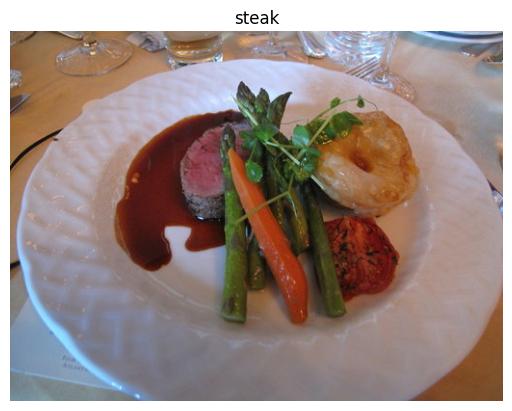

In [9]:
img = view_random_image(target_dir = "pizza_steak/train/",
                  target_class = "steak")

In [10]:
img.dtype

dtype('uint8')

In [11]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(384, 512, 3), dtype=uint8, numpy=
array([[[103,  86,  68],
        [102,  85,  67],
        [109,  91,  71],
        ...,
        [170, 158, 170],
        [166, 154, 166],
        [163, 151, 163]],

       [[119, 102,  84],
        [116,  99,  81],
        [117,  99,  79],
        ...,
        [137, 139, 152],
        [125, 127, 140],
        [117, 119, 132]],

       [[123, 106,  88],
        [121, 104,  86],
        [119, 101,  81],
        ...,
        [ 73,  85,  99],
        [ 63,  79,  94],
        [ 59,  75,  90]],

       ...,

       [[115, 145, 156],
        [114, 144, 155],
        [115, 143, 155],
        ...,
        [117,  76,  44],
        [117,  76,  46],
        [117,  76,  46]],

       [[115, 145, 156],
        [115, 145, 156],
        [115, 145, 156],
        ...,
        [117,  76,  46],
        [116,  75,  45],
        [116,  75,  45]],

       [[115, 144, 158],
        [115, 144, 158],
        [117, 147, 158],
        ...,
        [117,  76,  4

In [12]:
img.shape # This returns height, wodth and colour channels

(384, 512, 3)

In [13]:
# Get all the pixel values between 0 and 1
# This is called scaling or normalizing. Models prefer this.
img/255.

array([[[0.40392157, 0.3372549 , 0.26666667],
        [0.4       , 0.33333333, 0.2627451 ],
        [0.42745098, 0.35686275, 0.27843137],
        ...,
        [0.66666667, 0.61960784, 0.66666667],
        [0.65098039, 0.60392157, 0.65098039],
        [0.63921569, 0.59215686, 0.63921569]],

       [[0.46666667, 0.4       , 0.32941176],
        [0.45490196, 0.38823529, 0.31764706],
        [0.45882353, 0.38823529, 0.30980392],
        ...,
        [0.5372549 , 0.54509804, 0.59607843],
        [0.49019608, 0.49803922, 0.54901961],
        [0.45882353, 0.46666667, 0.51764706]],

       [[0.48235294, 0.41568627, 0.34509804],
        [0.4745098 , 0.40784314, 0.3372549 ],
        [0.46666667, 0.39607843, 0.31764706],
        ...,
        [0.28627451, 0.33333333, 0.38823529],
        [0.24705882, 0.30980392, 0.36862745],
        [0.23137255, 0.29411765, 0.35294118]],

       ...,

       [[0.45098039, 0.56862745, 0.61176471],
        [0.44705882, 0.56470588, 0.60784314],
        [0.45098039, 0

## An end to end example

Let's build a convolutional neural network to find patterns in our images, more specifically we need to:

* Load our images
* Preprocess them to normalized form
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3, # can also be (3, 3)
                         activation="relu",
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])

# Compile the model
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 22s 350ms/step - loss: 0.6743 - accuracy: 0.5360 - val_loss: 0.6004 - val_accuracy: 0.6560
Epoch 2/5
47/47 [==============================] - 7s 153ms/step - loss: 0.5459 - accuracy: 0.7333 - val_loss: 0.4098 - val_accuracy: 0.8440
Epoch 3/5
47/47 [==============================] - 6s 120ms/step - loss: 0.4285 - accuracy: 0.8033 - val_loss: 0.4143 - val_accuracy: 0.8040
Epoch 4/5
47/47 [==============================] - 7s 139ms/step - loss: 0.4011 - accuracy: 0.8213 - val_loss: 0.3497 - val_accuracy: 0.8440
Epoch 5/5
47/47 [==============================] - 7s 142ms/step - loss: 0.3605 - accuracy: 0.8473 - val_loss: 0.3190 - val_accuracy: 0.8600


In [15]:
# Summary of the model
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

## Using the same model as before

Let's replicate the model we've built in a previous section to see if it works with our image data.

In [16]:
import tensorflow as tf

# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (224, 224, 3)),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

# Compile the model
model_2.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data,
              epochs = 5,
              steps_per_epoch = len(train_data),
              validation_data = valid_data,
              validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 161ms/step - loss: 0.9251 - accuracy: 0.5067 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 5s 116ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 6s 128ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 6s 118ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 6s 121ms/step - loss: 0.6932 - accuracy: 0.4813 - val_loss: 0.6931 - val_accuracy: 0.5000


In [17]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all the values normalized)
train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

# Setup paths to our data directories
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

# Import data from directories and convert them into batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size = 32,
                                               target_size = (224, 224),
                                               class_mode = "binary", # Because we are dealing with 2 classes here
                                               seed = 42)

valid_data = valid_datagen.flow_from_directory(directory = test_dir,
                                               batch_size = 32,
                                               target_size = (224, 224),
                                               class_mode = "binary",
                                               seed  =42)

# Build a CNN model (same as tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 10,
                               kernel_size = 3,
                               activation = "relu",
                               input_shape = (224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size = 2,
                              padding = "valid"),
    tf.keras.layers.Conv2D(10, 3, activation = "relu"),
    tf.keras.layers.Conv2D(10, 3, activation = "relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

# Compile our CNN
model_1.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs = 5,
                        steps_per_epoch= len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 7s 121ms/step - loss: 0.6657 - accuracy: 0.6393 - val_loss: 0.5025 - val_accuracy: 0.7600
Epoch 2/5
47/47 [==============================] - 6s 130ms/step - loss: 0.4876 - accuracy: 0.7767 - val_loss: 0.4896 - val_accuracy: 0.7620
Epoch 3/5
47/47 [==============================] - 7s 142ms/step - loss: 0.4500 - accuracy: 0.8060 - val_loss: 0.4241 - val_accuracy: 0.8020
Epoch 4/5
47/47 [==============================] - 6s 121ms/step - loss: 0.4217 - accuracy: 0.8180 - val_loss: 0.3559 - val_accuracy: 0.8680
Epoch 5/5
47/47 [==============================] - 7s 139ms/step - loss: 0.3941 - accuracy: 0.8287 - val_loss: 0.3801 - val_accuracy: 0.8500


In [18]:
# Get summary of model 2
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602141 (2.30 MB)
Trainable params: 602141 (2.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Despite having 20X more parameters than our CNN(model_1), out model_2 performs very bad. Let's try to improve it.

In [19]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (224, 224, 3)),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid"),
])

# Compile the model
model_3.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 8s 149ms/step - loss: 2.7610 - accuracy: 0.6420 - val_loss: 0.5176 - val_accuracy: 0.7600
Epoch 2/5
47/47 [==============================] - 5s 111ms/step - loss: 0.9374 - accuracy: 0.6807 - val_loss: 1.5072 - val_accuracy: 0.5560
Epoch 3/5
47/47 [==============================] - 6s 131ms/step - loss: 0.7770 - accuracy: 0.7153 - val_loss: 0.7232 - val_accuracy: 0.7580
Epoch 4/5
47/47 [==============================] - 6s 120ms/step - loss: 0.5616 - accuracy: 0.7440 - val_loss: 0.6893 - val_accuracy: 0.6660
Epoch 5/5
47/47 [==============================] - 6s 122ms/step - loss: 0.5659 - accuracy: 0.7553 - val_loss: 0.4446 - val_accuracy: 0.7820


In [20]:
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 150528)            0         
                                                                 
 dense_5 (Dense)             (None, 100)               15052900  
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 100)               10100     
                                                                 
 dense_8 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15073201 (57.50 MB)
Trainable params: 15073201 (57.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


If we compare the trainable parameters in the model_3 and model_1, we see that there are about 500 times the trainable parameters in model_3 as compared to model_1. Still, model_3 has a validation accuracy score of 75ish while CNN has around 84. Thus, we can conclude that CNN has something better, making it a goof preference over other existing things.

Note: One can think of parametrers as patterns a model can learn from the data. Intutively, one can think that more is better. it is. But here, the difference is the two different styles of model we are using. Where a series of dense layers has a number of different learnable parameters connected to each other and hence a higher number of possible learnavle patterns, a CNN seeks to sort out and learn the most important patterns in an image. So even though there are less learnable parameters in our CNN, there are more helpful in deciphering between different features in an image. It's like a battle between quantity and quality. A normal model learns more number of characteristis, but those are not quality characters, hence unable to differentiate.

## Binary Classification: Let's break it down

1. Become one with data (visualize, visualize, visualize)
2. Preprocess the data (Prepared it for our model, the main step here was scaling/normalizing and turning our data into batches)
3. Created a model (start with baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model (try to beat our baseline). Here, our baseline is the **Food 101** paper.
7. Repeat until satisfied (experiment, experiment, experiment)

### 1. Become one with data

['2324994.jpg']
Image shape: (384, 512, 3)
['1269960.jpg']
Image shape: (512, 512, 3)


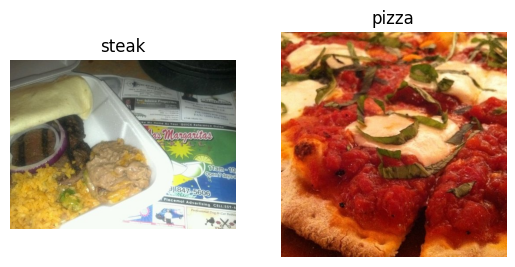

In [21]:
# Visualize the data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

### 2. Preprocess the data (prepare it for a model)

In [22]:
# Define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Our next step is to turn our data into **batches**

A batch is a small subset of data. Rather than look at all 10,000 images at one time, a model looks at only 32 images when the data is in batches.

This is done for a variety of reasons:
1. 10,000 images (or more) might not fit into the memory of our processor(GPU).
2. Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.

Why 32?
Because according to the founder of CNN, friends don't allow their friends to train in minibatches of more than 32. And also because 32 is good for health.

In [23]:
# Create train and test data generators and rescale them
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

In [24]:
# Load our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory = train_dir, # Target directory of images
                                               target_size = (224, 224), # Target size of images (height, width)
                                               class_mode = "binary", # Type of data you are working with
                                               batch_size = 32) # Size of minibatches to load data into

test_data = test_datagen.flow_from_directory(directory = test_dir,
                                             target_size = (224, 224),
                                             class_mode = "binary",
                                             batch_size = 32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [25]:
images, labels = train_data.next() # next() brings the next batch of images/ labels in the train data
len(images), len(labels)

(32, 32)

In [26]:
# Number of batches?
len(train_data)

47

In [27]:
images[:2], images[0].shape

(array([[[[0.1137255 , 0.11764707, 0.18823531],
          [0.1137255 , 0.11764707, 0.18823531],
          [0.10980393, 0.1137255 , 0.18431373],
          ...,
          [0.9607844 , 0.9450981 , 0.9490197 ],
          [0.8313726 , 0.81568635, 0.8196079 ],
          [0.9843138 , 0.9686275 , 0.9725491 ]],
 
         [[0.12156864, 0.1254902 , 0.19607845],
          [0.1254902 , 0.12941177, 0.20000002],
          [0.10196079, 0.10588236, 0.1764706 ],
          ...,
          [0.9333334 , 0.92549026, 0.9294118 ],
          [0.909804  , 0.90196085, 0.9058824 ],
          [0.9960785 , 0.98823535, 0.9921569 ]],
 
         [[0.09803922, 0.10196079, 0.17254902],
          [0.10588236, 0.10980393, 0.18039216],
          [0.1254902 , 0.13333334, 0.19215688],
          ...,
          [0.8000001 , 0.79215693, 0.7960785 ],
          [0.909804  , 0.90196085, 0.9058824 ],
          [1.        , 0.9960785 , 1.        ]],
 
         ...,
 
         [[0.09803922, 0.07843138, 0.09411766],
          [0.07843

In [28]:
# View the first batch of labels
labels

array([0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0.],
      dtype=float32)

### 3. Create a CNN model (start with a baseline)

A baseline is a relatively simple modle or existing result that you setup when beginning a machine learning experiment and then you keep experimenting, trying to beat the basleine

**Note:** In deep learning, there is an infinite number of architectures that one can make. But the best way to approach a problem is by starting with something simple and then introducing the complexities as required. For a better working, look at the model which is currently performing best in the field of the problem you are dealing with.

In [29]:
 # Make the creating of our model little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [30]:
# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)
model_4 = Sequential([
  Conv2D(filters=10,
         kernel_size=3,
         strides=1,
         padding='valid',
         activation='relu',
         input_shape=(224, 224, 3)), # input layer (specify input shape)
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  Flatten(),
  Dense(1, activation='sigmoid') # output layer (specify output shape)
])

In [31]:
model_4.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

In [32]:
# Get a summary of our model
model_4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_9 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_10 (Conv2D)          (None, 218, 218, 10)      910       
                                                                 
 flatten_4 (Flatten)         (None, 475240)            0         
                                                                 
 dense_9 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 477341 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 4. Fit the model

In [33]:
# Check the lengths of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [34]:
# Fit the model
history_4 = model_4.fit(train_data,
                            epochs = 5,
                            steps_per_epoch = len(train_data),
                            validation_data = test_data,
                            validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 9s 132ms/step - loss: 0.7069 - accuracy: 0.6780 - val_loss: 0.4276 - val_accuracy: 0.7980
Epoch 2/5
47/47 [==============================] - 7s 152ms/step - loss: 0.4168 - accuracy: 0.8253 - val_loss: 0.3794 - val_accuracy: 0.8500
Epoch 3/5
47/47 [==============================] - 6s 122ms/step - loss: 0.3020 - accuracy: 0.8767 - val_loss: 0.3572 - val_accuracy: 0.8540
Epoch 4/5
47/47 [==============================] - 7s 152ms/step - loss: 0.1677 - accuracy: 0.9500 - val_loss: 0.3778 - val_accuracy: 0.8240
Epoch 5/5
47/47 [==============================] - 6s 119ms/step - loss: 0.0830 - accuracy: 0.9807 - val_loss: 0.3648 - val_accuracy: 0.8480


In [35]:
model_1.evaluate(test_data)

16/16 [==============================] - 2s 105ms/step - loss: 0.3801 - accuracy: 0.8500


[0.3801157772541046, 0.8500000238418579]

In [36]:
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 110, 110, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_7 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                 

### 5. Evaluating our model

It looks like our model is learning something, let's  evaluate it.

<Axes: >

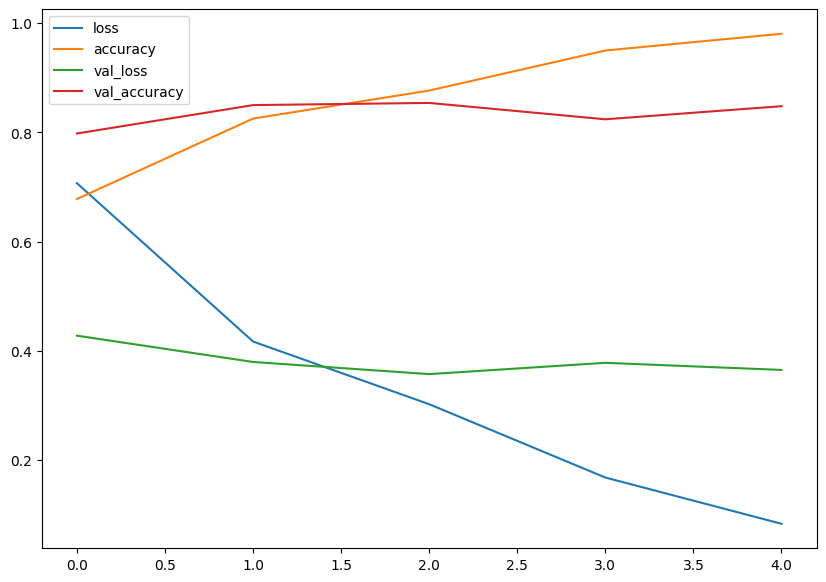

In [37]:
# Let's plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize = (10, 7))

In [38]:
# Plot the validation and training curves seperately
def plot_loss_curves(history):
  """
  Returns seperate loss curves for training and validation metrics
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]
  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) #how many epochs did we run it for?

  # Plot loss
  plt.plot(epochs, loss, label = "training_loss")
  plt.plot(epochs, val_loss, label= " val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label = "training accuracy")
  plt.plot(epochs, val_accuracy, label = "val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

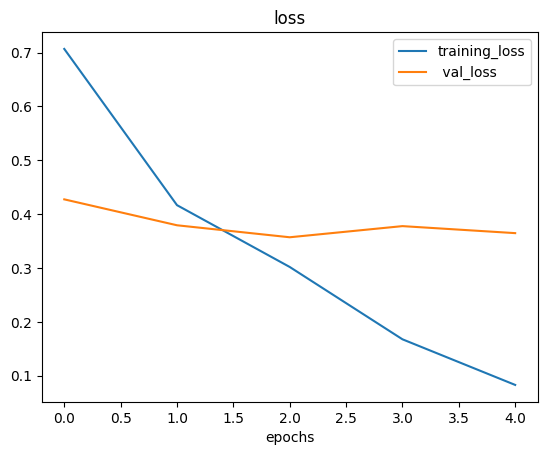

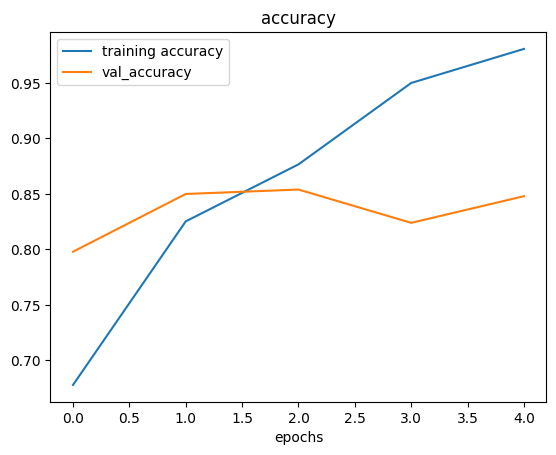

In [39]:
# Check out the loss and accuracy of model_4
plot_loss_curves(history_4)

> **Note**: When a model's **validation loss starts to increase**, it's likely that the model is **overfitting** the training datasaet. This means, it's learning the patterns in the training dataset *too well* and thus model's ability to generalise to unseen data will be diminished.

### 6. Adjust the model parameters
Fitting the machine learning model comes in 3 steps:

0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce the overfitting

Ways to induce overfitting:
* Increase the number of conv layers
* Increase the number of conv filters
* Add another dense layer to the output of our flattened layer

Reduce overfitting:
* Add data augmentation
* Add regularization layers (such as MaxPool2D)
* Add more data

> **Note**: Reducing overfitting is also called **regularization**


In [40]:
# Create the model (this is going to be our new baseline)
model_5 = Sequential([
    Conv2D(10, 3, activation= "relu", input_shape = (224, 224, 3)),
    MaxPool2D(pool_size = 2),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation = "sigmoid")
])

In [41]:
# Compile the model
model_5.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

In [42]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 7s 121ms/step - loss: 0.6070 - accuracy: 0.6880 - val_loss: 0.4529 - val_accuracy: 0.8200
Epoch 2/5
47/47 [==============================] - 6s 132ms/step - loss: 0.4400 - accuracy: 0.8013 - val_loss: 0.3656 - val_accuracy: 0.8460
Epoch 3/5
47/47 [==============================] - 5s 115ms/step - loss: 0.4038 - accuracy: 0.8187 - val_loss: 0.4212 - val_accuracy: 0.7880
Epoch 4/5
47/47 [==============================] - 6s 138ms/step - loss: 0.3626 - accuracy: 0.8533 - val_loss: 0.3353 - val_accuracy: 0.8500
Epoch 5/5
47/47 [==============================] - 7s 142ms/step - loss: 0.3239 - accuracy: 0.8687 - val_loss: 0.3330 - val_accuracy: 0.8720


In [43]:
# Get a summary of our model which has MaxPool layer
model_5.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 111, 111, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 29160)             0         
                                                                 
 dense_10 (Dense)            (None, 1)                

In [44]:
model_4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_9 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_10 (Conv2D)          (None, 218, 218, 10)      910       
                                                                 
 flatten_4 (Flatten)         (None, 475240)            0         
                                                                 
 dense_9 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 477341 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


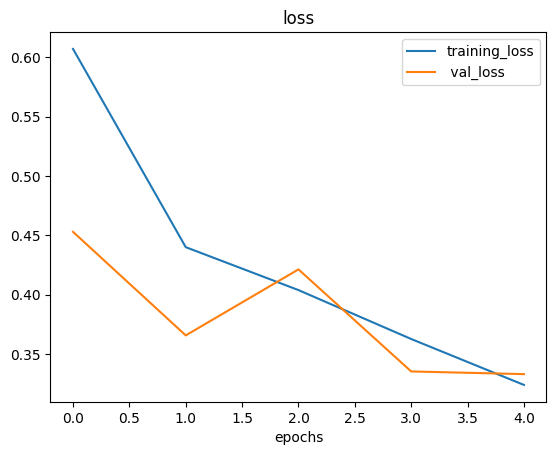

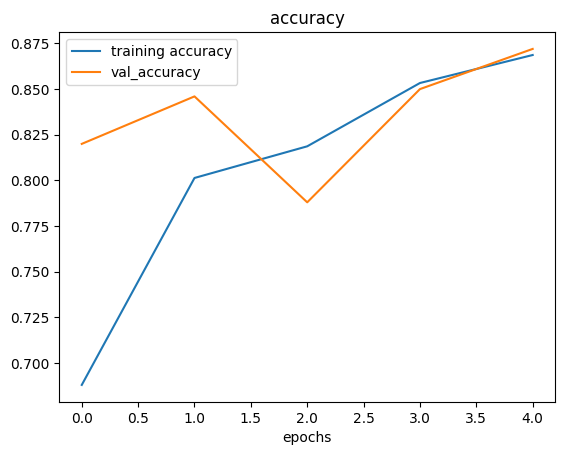

In [45]:
# Plot the loss curve for model_5
plot_loss_curves(history_5)

### Opening our bag of tricks and finding data augmentation

In [46]:
# Create ImageDataGeneratir training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(1/255., #
                                          rotation_range = 0.2, # how much do you want to rotate an image?
                                          shear_range = 0.2, # how much do you want to shear an image? shear refers to rotation wrt to a particular axis
                                          zoom_range = 0.2, # zoom in randomly on an image
                                          width_shift_range = 0.2, # move your image around on x-axis
                                          height_shift_range = 0.3, # move your image around on y-axis
                                          horizontal_flip = True, # do you want to flip the image?
                                          )

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale = 1/255.)

# Create ImageDataGenerator without data augmentation for the test data
test_datagen = ImageDataGenerator(rescale= 1/255.)

> **Question:** What is data augmentation

Data augmentation is the process of altering our training data, leading it to have more diversityand in turn allowing our models to learn more generalizable patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something on a similar line.

Let's write some code to visualize data augmentation...

In [47]:
# Import data and augment it from training directory
print("Augmented training data: ")
train_data_augmented = train_datagen.flow_from_directory(train_dir,
                                                                   target_size = (224,224),
                                                                   batch_size = 32,
                                                                   class_mode = "binary",
                                                                   shuffle = False) #for demonstration purposes onl

# Create non-augmented train data batches
print("Non-augmented training data: ")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (224,224),
                                               batch_size = 32,
                                               class_mode = "binary",
                                               shuffle = False)


IMG_SIZE = (224, 224)
# Create non-augmented test data batches
print("Non-augmented test data:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size = IMG_SIZE,
                                             class_mode = "binary")

Augmented training data: 
Found 1500 images belonging to 2 classes.
Non-augmented training data: 
Found 1500 images belonging to 2 classes.
Non-augmented test data:
Found 500 images belonging to 2 classes.




> **Note:** Data augmentation is usually only performed on the training data, Using `ImageDataGenerator` built-in data augmentation parameters our images are left as they are in the directories but are modified as they are loaded into the model.

Finally, let's visualize some augmented data!!!

In [48]:
# Get some sample data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() #note: labels are not sugmented, only the data (images) are

Showing image number: 21


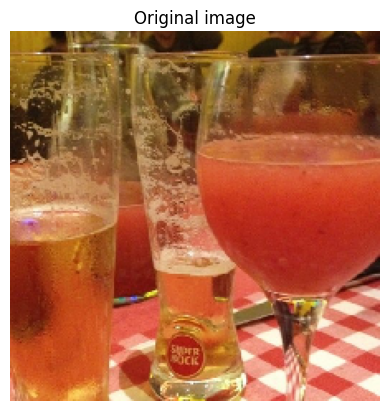

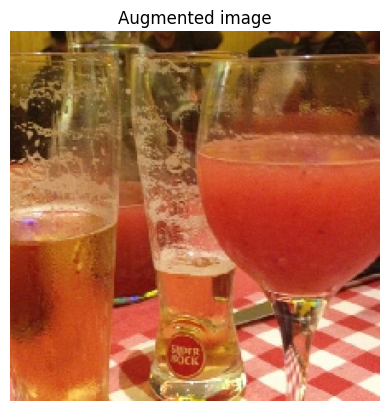

In [49]:
# Showing original and augmented images
import random
random_number = random.randint(0,31) # our batch size is 32
print(f"Showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False);
plt.figure()
plt.imshow(augmented_images[random_number]) #did the .astype("uint8") because there was an issue with plotting of image (Link: https://stackoverflow.com/questions/49643907/clipping-input-data-to-the-valid-range-for-imshow-with-rgb-data-0-1-for-floa)
plt.title(f"Augmented image")
plt.axis(False);

Now we've seen what augmented data looks like, let's build a model and see how it learns on augmented data.

In [50]:
# Create a model (same as model_5)
model_6 = Sequential([
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(pool_size = 2),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(pool_size = 2),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(pool_size = 2),
    Flatten(),
    Dense(1, activation = "sigmoid")
])

# Compile the model
model_6.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

# Fit the model
history_6 = model_6.fit(train_data_augmented, # fitting model_6 on augmented training data
                        epochs = 5,
                        steps_per_epoch = len(train_data_augmented),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 8s 132ms/step - loss: 0.7149 - accuracy: 0.4167 - val_loss: 0.6915 - val_accuracy: 0.6040
Epoch 2/5
47/47 [==============================] - 6s 119ms/step - loss: 0.6990 - accuracy: 0.5247 - val_loss: 0.6935 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 6s 123ms/step - loss: 0.6860 - accuracy: 0.5507 - val_loss: 0.6968 - val_accuracy: 0.5140
Epoch 4/5
47/47 [==============================] - 5s 116ms/step - loss: 0.6852 - accuracy: 0.6427 - val_loss: 0.6465 - val_accuracy: 0.6800
Epoch 5/5
47/47 [==============================] - 5s 115ms/step - loss: 0.5862 - accuracy: 0.7093 - val_loss: 0.5201 - val_accuracy: 0.7440


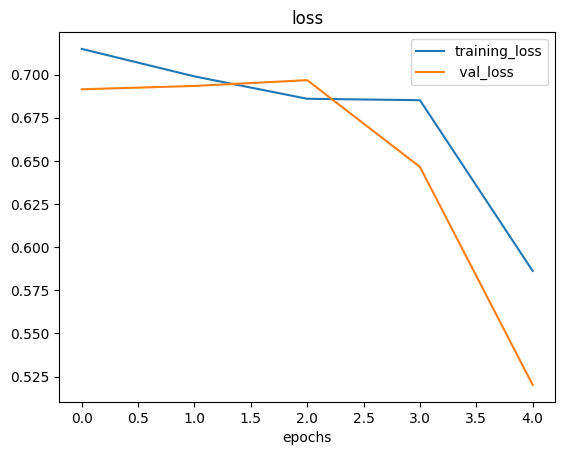

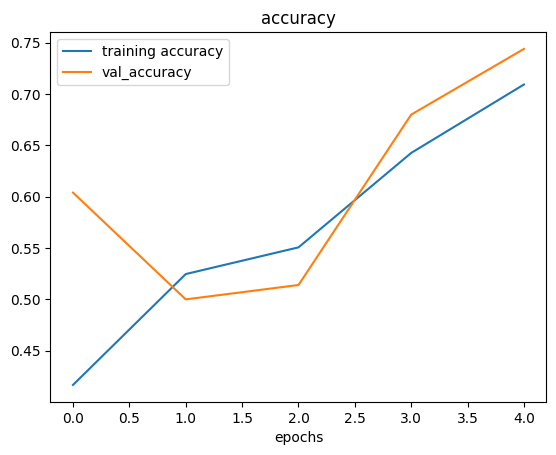

In [51]:
# Check our model's training curves
plot_loss_curves(history_6)

Let's shuffle our augmented training data and train another model (the same as before) on it and see what happens.

In [52]:
# Import data and augment it and shuffle it from the training directory
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size = (224,224),
                                                                            class_mode = "binary",
                                                                            batch_size = 32,
                                                                            shuffle = True) # shuffle data this time

Found 1500 images belonging to 2 classes.


In [53]:
# Create the model (same as model_5 and model_6)
model_7 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled, # now the augmented data is shuffled
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1862: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


Epoch 1/5
47/47 [==============================] - 31s 625ms/step - loss: 10.3844 - accuracy: 0.5240 - val_loss: 0.6925 - val_accuracy: 0.5300
Epoch 2/5
47/47 [==============================] - 22s 464ms/step - loss: 0.8610 - accuracy: 0.5580 - val_loss: 0.6927 - val_accuracy: 0.5940
Epoch 3/5
47/47 [==============================] - 21s 439ms/step - loss: 0.7369 - accuracy: 0.5680 - val_loss: 0.6930 - val_accuracy: 0.5040
Epoch 4/5
47/47 [==============================] - 22s 463ms/step - loss: 0.7093 - accuracy: 0.5973 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 23s 491ms/step - loss: 0.6943 - accuracy: 0.5940 - val_loss: 0.6933 - val_accuracy: 0.5000


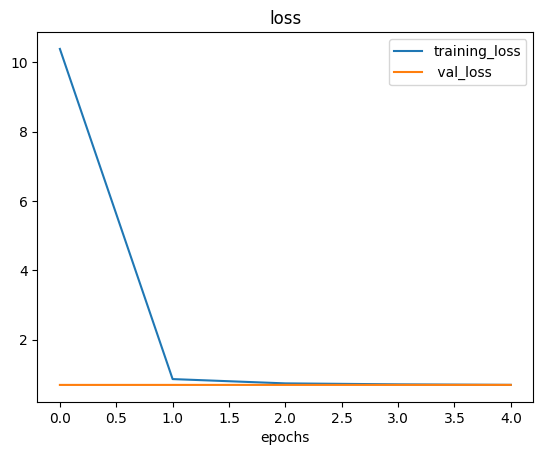

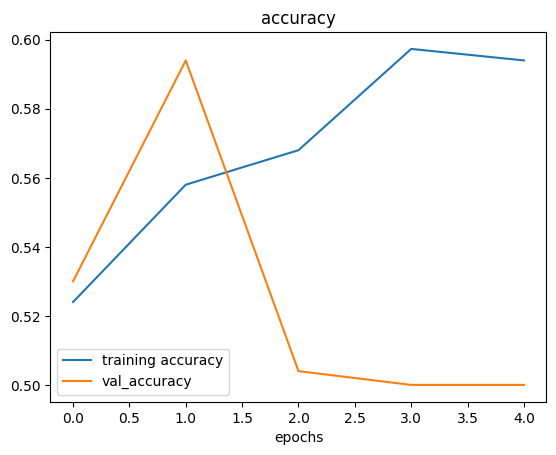

In [54]:
# Plot loss curves
plot_loss_curves(history_7)

> **Note:** When shuffling training data, the model gets exposed to all different kinds of dataduring training, enabling it to learn features across a wide array of images (in our case, pizza & steak at the same time instead of just pizza then steak)

### 7. Repeat until satisfied

Since we've already beaten our baseline, there are few things we can try to improve our model:

* Increase the number of model layers (eg. add more `Conv2D` or `MaxPool2D` layers)
* Increase the number of filters in each convolutional layer (eg. from 10 to 32 or even 64)
* Train for a longer (more epochs)
* Find an ideal learning rate
* Get more data (give the model more opportunities to learn)
* Use **transfer learning** to leverage what another image model has learnt and adjust it for our own use case

> **Practice:** Recreate the model on CNN explainer website (same as model_1) and see how it performs on the augmented shuffled data.

In [55]:
model_8 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3, # can also be (3, 3)
                         activation="relu",
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])

# Compile the model
model_8.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_8 = model_8.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 23s 447ms/step - loss: 14.6745 - accuracy: 0.5260 - val_loss: 0.6928 - val_accuracy: 0.5520
Epoch 2/5
47/47 [==============================] - 22s 469ms/step - loss: 0.7520 - accuracy: 0.5847 - val_loss: 0.6928 - val_accuracy: 0.5380
Epoch 3/5
47/47 [==============================] - 22s 471ms/step - loss: 0.6837 - accuracy: 0.6180 - val_loss: 0.6921 - val_accuracy: 0.5800
Epoch 4/5
47/47 [==============================] - 22s 472ms/step - loss: 0.6543 - accuracy: 0.6400 - val_loss: 0.6912 - val_accuracy: 0.5880
Epoch 5/5
47/47 [==============================] - 21s 451ms/step - loss: 0.6368 - accuracy: 0.6687 - val_loss: 0.6904 - val_accuracy: 0.5700


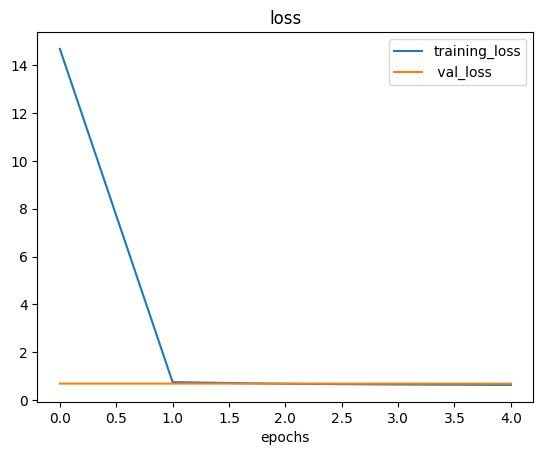

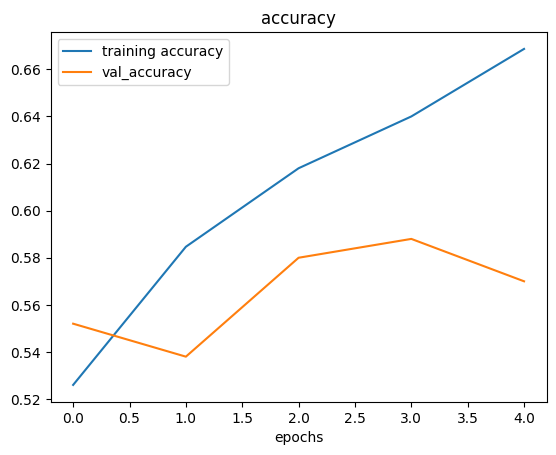

In [56]:
plot_loss_curves(history_8)

## Making a prediction with our trained model on our custom data

In [57]:
# Classes we're working with
class_names

array(['pizza', 'steak'], dtype='<U5')

--2024-01-24 05:16:27--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.08s   

2024-01-24 05:16:27 (22.4 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



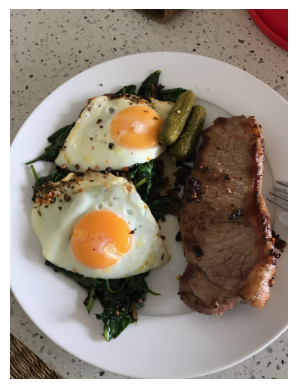

In [58]:
# View our example image
import  matplotlib.image as  mpimg
import matplotlib.pyplot as plt
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [59]:
# Check the shape of our image
steak.shape

(4032, 3024, 3)

In [60]:
steak

array([[[162, 158, 149],
        [163, 159, 150],
        [166, 162, 153],
        ...,
        [136,  17,  23],
        [140,  21,  27],
        [140,  21,  27]],

       [[164, 160, 151],
        [164, 160, 151],
        [164, 160, 151],
        ...,
        [133,  14,  20],
        [134,  15,  21],
        [137,  18,  24]],

       [[166, 162, 153],
        [165, 161, 152],
        [163, 159, 150],
        ...,
        [136,  17,  23],
        [134,  15,  21],
        [136,  17,  23]],

       ...,

       [[154, 132, 111],
        [142, 121, 100],
        [101,  80,  59],
        ...,
        [164, 155, 148],
        [152, 141, 135],
        [140, 129, 123]],

       [[141, 119,  96],
        [138, 118,  94],
        [106,  85,  64],
        ...,
        [158, 147, 141],
        [142, 131, 125],
        [138, 127, 121]],

       [[148, 126, 102],
        [148, 128, 103],
        [114,  93,  72],
        ...,
        [153, 142, 136],
        [138, 127, 121],
        [143, 132, 126]]

> **Note**: When you train a neural network and you want to make a prediction with it on your own custom data, it's important that your custom data (or new data) is preprocessed into the same format as the data your model was trained on.

In [61]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape = 224):
  """
  Reads an image from filename, turns it into a tensor and reshapes it to (img_shape, img_shape, colour_channels).
  """

  # Read in the image
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, size = [img_shape, img_shape])
  # Rescale the image (getting the values between 0 and 1)
  img = img/255.
  return img

In [62]:
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [63]:
pred = model_7.predict(tf.expand_dims(steak, axis = 0))
pred

1/1 [==============================] - 0s 248ms/step


array([[0.4885889]], dtype=float32)

Looks like our custom image is being put through our model, however, it currently outputs a prediction probability. It would be better if we could visualize the image as well as model's predictions.

In [64]:
# Remind ourselves of our class names
class_names

array(['pizza', 'steak'], dtype='<U5')

In [65]:
# We can index the predicted class by rounding the prediction probability and indexing it on the class names
pred_class = class_names[int(tf.round(pred))]
pred_class

'pizza'

In [66]:
def pred_and_plot(model, filename, class_names = class_names):
  """
  Imports an image located at filename, makes a prediction with model and plots the image with the predicted class as the title
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction on the image
  pred = model.predict(tf.expand_dims(img, axis = 0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  # Plot the image and the predicted class
  plt.imshow(img)
  plt.axis(False)
  plt.title(f"Prediction: {pred_class} {pred}");

1/1 [==============================] - 0s 17ms/step


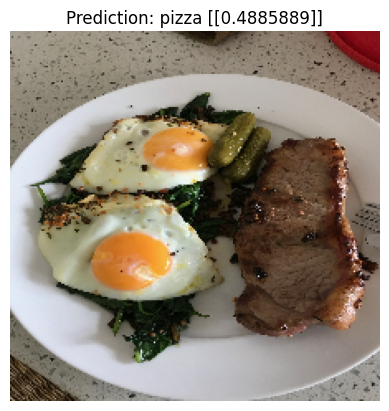

In [67]:
# Test out model on custom image
pred_and_plot(model_7, "03-steak.jpeg")

--2024-01-24 05:16:30--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.07s   

2024-01-24 05:16:30 (40.7 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]

1/1 [==============================] - 0s 17ms/step


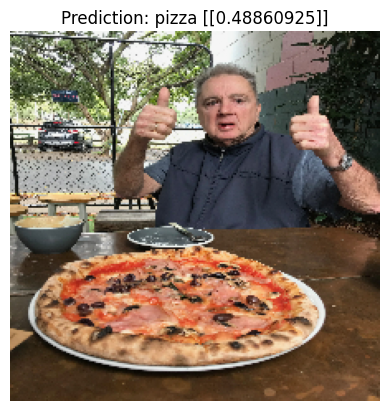

In [68]:
# Let's try on another image, this time on an image of a pizza
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_7, "03-pizza-dad.jpeg")

# Multi-class image classification

We've just been through a bunch of the following steps with a binary classification problem (pizza vs. steak), now we're going to step things up a notch with 10 classes of food (multi-class classification).

1. Become one with the data
2. Preprocess the data (get it ready for the model)
3. Create a model (start with a baseline)
4. Fit the model (overfit it to make sure it works)
5. Evaluate the model
6. Adjust different hyperparameters and improve the model (try to beat the baseline/ reduce overfitting)
7. Repeat until satisfied.

## 1. Import and become one with the data

In [69]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2024-01-24 05:16:31--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.69.207, 64.233.181.207, 64.233.182.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.69.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   219MB/s    in 2.3s    

2024-01-24 05:16:33 (219 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [70]:
import os

# Walk through 10 classes of food image data
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 

In [71]:
# Setup the train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [72]:
# Let's get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['1242614.jpg']
Image shape: (512, 512, 3)


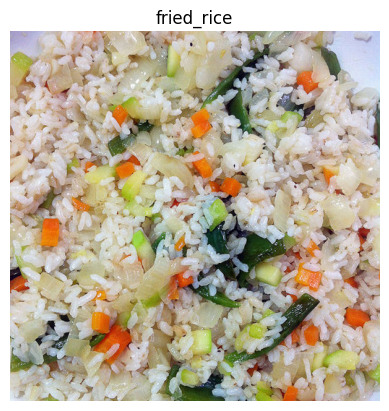

In [73]:
# Visualize the data
import random
img = view_random_image(target_dir = train_dir,
                        target_class = random.choice(class_names))

### Preprocess the data (prepare it for a model)

In [74]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale the data
train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (224,224),
                                               batch_size = 32,
                                               class_mode = "categorical")

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size = (224,224),
                                             batch_size = 32,
                                             class_mode = "categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### 3. Create a model (start with a baseline)

We are replicating the model on the CNN explainer websote as that model too is for 10 class of images

In [75]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation # Activation can either be kept as another layers or just can be included in the Conv2D layer using the activation function.

# Create our model (same as the one on CNN explainer website)
model_9 = Sequential([
    Conv2D(10,3, input_shape = (224,224,3)),
    Activation(activation = "relu"),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation = "relu"),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation = "softmax")
])

# Compile the model
model_9.compile(loss="categorical_crossentropy", # changed to categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

### 4. Fit the model

In [76]:
history_9 = model_9.fit(train_data,
            epochs = 5,
            steps_per_epoch = len(train_data),
            validation_data = test_data,
            validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 32s 129ms/step - loss: 2.1378 - accuracy: 0.2169 - val_loss: 2.0356 - val_accuracy: 0.2736
Epoch 2/5
235/235 [==============================] - 29s 124ms/step - loss: 1.9025 - accuracy: 0.3401 - val_loss: 1.9248 - val_accuracy: 0.3176
Epoch 3/5
235/235 [==============================] - 30s 128ms/step - loss: 1.5412 - accuracy: 0.4777 - val_loss: 1.9963 - val_accuracy: 0.3304
Epoch 4/5
235/235 [==============================] - 29s 124ms/step - loss: 0.9589 - accuracy: 0.6837 - val_loss: 2.5763 - val_accuracy: 0.2880
Epoch 5/5
235/235 [==============================] - 28s 121ms/step - loss: 0.3868 - accuracy: 0.8829 - val_loss: 3.5478 - val_accuracy: 0.2752


### 5. Evaluate the model

In [77]:
# Evaluate on the test data
model_9.evaluate(test_data)

79/79 [==============================] - 7s 92ms/step - loss: 3.5478 - accuracy: 0.2752


[3.547797203063965, 0.2752000093460083]

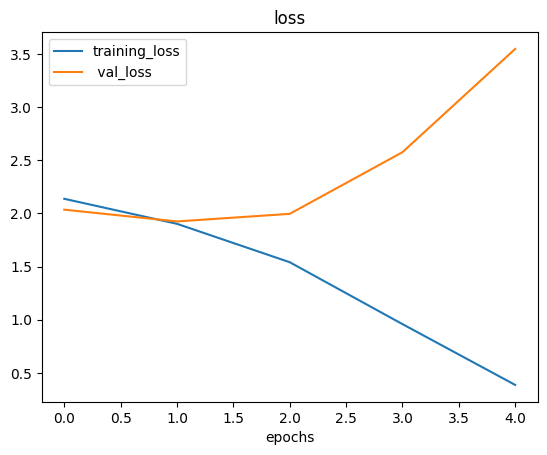

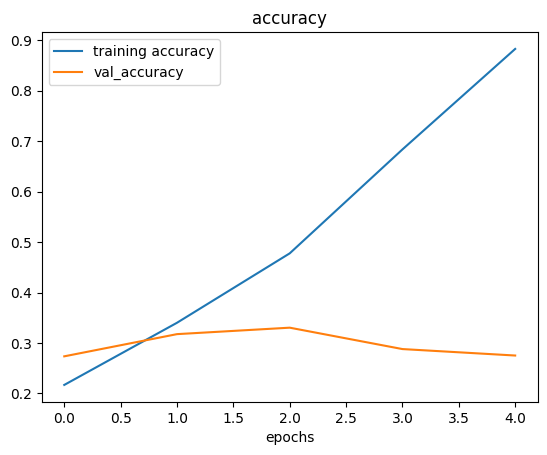

In [78]:
# Check out the model's loss curves on the 10 classes
plot_loss_curves(history_9)

What do these curves tell us?

Our model is potentially overfitting on the data.. meaning it's getting great results on the training data but fails to generalize well to unseen data and performs poorly on the test dataset.

### 6. Adjust the model hyperparameters (to beat the baseline or reduce overfitting)

Due to its performance on the training data, it's clear our model is learning something.

However, it is not generalizing well to the unseen data.

So, let's try and fix overfitting by:
* **Get more data**: having more data gives the model more opportunity to learn diverse patterns.
* **Simplify the model**: If our current model is overfitting the data, it may be too complicated of a model, one way to simplify the model is to reduce the number of hidden layers in the model or reduce the hidden units in the model.
* **Use data augmentation**: Data augmentation manipulates the training data in such a way to add more diversity to it (without altering the original data)
* **Use transfer learning**: Transfer learning leverages another model has learned on similar data to your own and allows you to use those patterns on your own dataset.



In [79]:
# How about we simplify the model first?
model_9.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 activation (Activation)     (None, 222, 222, 10)      0         
                                                                 
 conv2d_24 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 110, 110, 10)      0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_26 (Conv2D)          (None, 106, 106, 10)      910       
                                                      

In [80]:
# Let's try to remove two convolutional layers
model_10 = Sequential([
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation = "softmax")
])

model_10.compile(loss = "categorical_crossentropy",
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ["accuracy"])



In [81]:
# Fit the model with 2x conv layers removed
history_10 = model_10.fit(train_data,
                          epochs = 5,
                          steps_per_epoch = len(train_data),
                          validation_data = test_data,
                          validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 29s 120ms/step - loss: 2.0803 - accuracy: 0.2592 - val_loss: 1.9372 - val_accuracy: 0.3288
Epoch 2/5
235/235 [==============================] - 27s 116ms/step - loss: 1.7542 - accuracy: 0.4063 - val_loss: 1.8634 - val_accuracy: 0.3600
Epoch 3/5
235/235 [==============================] - 28s 120ms/step - loss: 1.3673 - accuracy: 0.5533 - val_loss: 1.9391 - val_accuracy: 0.3532
Epoch 4/5
235/235 [==============================] - 33s 139ms/step - loss: 0.8544 - accuracy: 0.7396 - val_loss: 2.1977 - val_accuracy: 0.3376
Epoch 5/5
235/235 [==============================] - 27s 116ms/step - loss: 0.4322 - accuracy: 0.8861 - val_loss: 2.6750 - val_accuracy: 0.3072


In [82]:
model_10.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, None, None, 10)    280       
                                                                 
 max_pooling2d_16 (MaxPooli  (None, None, None, 10)    0         
 ng2D)                                                           
                                                                 
 conv2d_28 (Conv2D)          (None, None, None, 10)    910       
                                                                 
 max_pooling2d_17 (MaxPooli  (None, None, None, 10)    0         
 ng2D)                                                           
                                                                 
 flatten_10 (Flatten)        (None, None)              0         
                                                                 
 dense_15 (Dense)            (None, 10)              

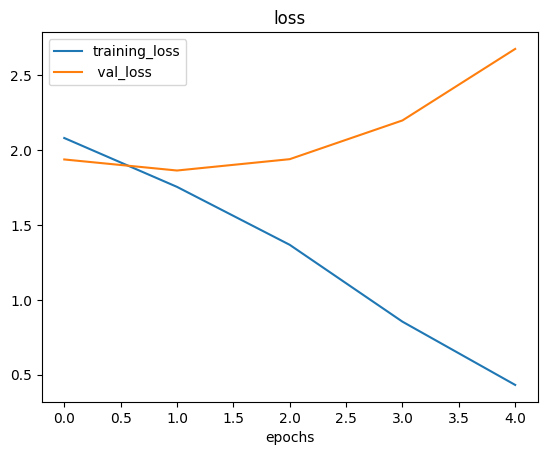

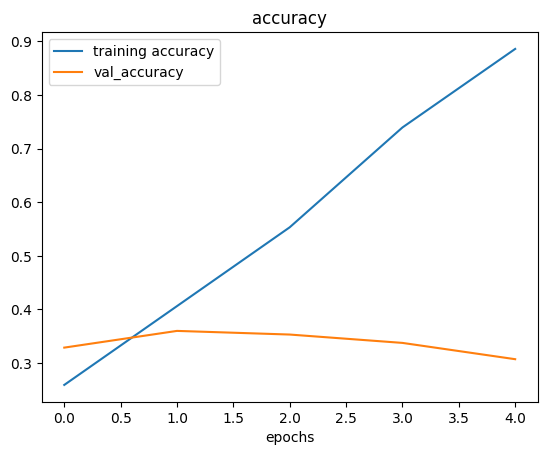

In [83]:
plot_loss_curves(history_10)

In [84]:
model_9.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 activation (Activation)     (None, 222, 222, 10)      0         
                                                                 
 conv2d_24 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 110, 110, 10)      0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_26 (Conv2D)          (None, 106, 106, 10)      910       
                                                      

In [85]:
model_10.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, None, None, 10)    280       
                                                                 
 max_pooling2d_16 (MaxPooli  (None, None, None, 10)    0         
 ng2D)                                                           
                                                                 
 conv2d_28 (Conv2D)          (None, None, None, 10)    910       
                                                                 
 max_pooling2d_17 (MaxPooli  (None, None, None, 10)    0         
 ng2D)                                                           
                                                                 
 flatten_10 (Flatten)        (None, None)              0         
                                                                 
 dense_15 (Dense)            (None, 10)              

Well, the number of parameters aree same for both the models, hence the change in the number of layers caused no effect.

### Trying to reduce overfitting with data augmentation

Let's try and improve our model's results by using augmented data...

Ideally, we want to:
* Reduce overfitting
* Improve validation accuracy

In [86]:
train_datagen_augmented = ImageDataGenerator (rescale = 1/255.,
                                              rotation_range = 0.2,
                                              width_shift_range = 0.2,
                                              height_shift_range = 0.2,
                                              zoom_range = 0.2,
                                              horizontal_flip = True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                               target_size = (224,224),
                                               batch_size = 32,
                                               class_mode = "categorical")

Found 7500 images belonging to 10 classes.


In [87]:
# Clone the model (use the same architecture)
model_11 = tf.keras.models.clone_model(model_9) # clone model copies the infrastructure of the model_9 and not the patterns learnt by it.

# Compile the cloned model (same setup as used for model_10)
model_11.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_11 = model_11.fit(train_data_augmented, # use augmented data
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 108s 452ms/step - loss: 2.2716 - accuracy: 0.1347 - val_loss: 2.1758 - val_accuracy: 0.2000
Epoch 2/5
235/235 [==============================] - 107s 456ms/step - loss: 2.1526 - accuracy: 0.2056 - val_loss: 2.0683 - val_accuracy: 0.2416
Epoch 3/5
235/235 [==============================] - 107s 456ms/step - loss: 2.0879 - accuracy: 0.2460 - val_loss: 1.9941 - val_accuracy: 0.2584
Epoch 4/5
235/235 [==============================] - 108s 458ms/step - loss: 2.0391 - accuracy: 0.2839 - val_loss: 1.9195 - val_accuracy: 0.3220
Epoch 5/5
235/235 [==============================] - 111s 474ms/step - loss: 2.0089 - accuracy: 0.2869 - val_loss: 1.8910 - val_accuracy: 0.3412


In [88]:
model_11.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 activation (Activation)     (None, 222, 222, 10)      0         
                                                                 
 conv2d_24 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 110, 110, 10)      0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_26 (Conv2D)          (None, 106, 106, 10)      910       
                                                      

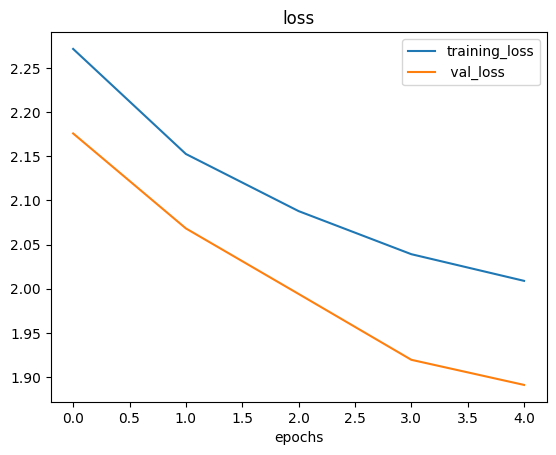

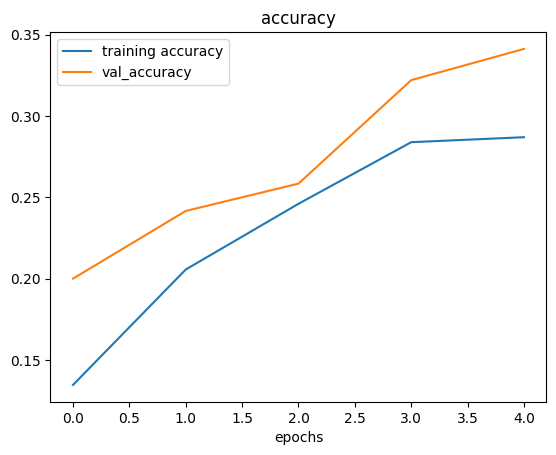

In [89]:
# Check out our model trained on augmented data's loss curves
plot_loss_curves(history_11)

In [90]:
model_9.evaluate(test_data)

79/79 [==============================] - 6s 79ms/step - loss: 3.5478 - accuracy: 0.2752


[3.547797203063965, 0.2752000093460083]

In [91]:
model_11.evaluate(test_data)

79/79 [==============================] - 7s 88ms/step - loss: 1.8910 - accuracy: 0.3412


[1.8910353183746338, 0.34119999408721924]

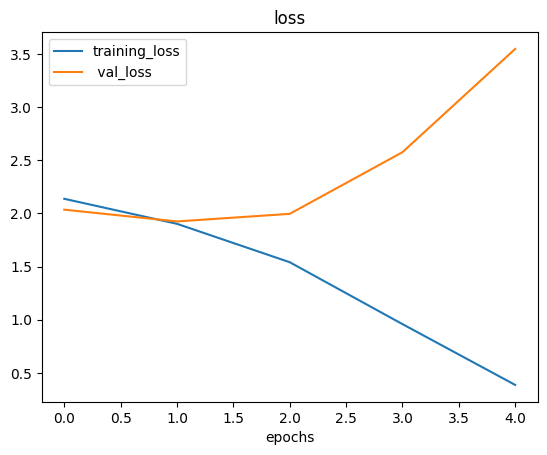

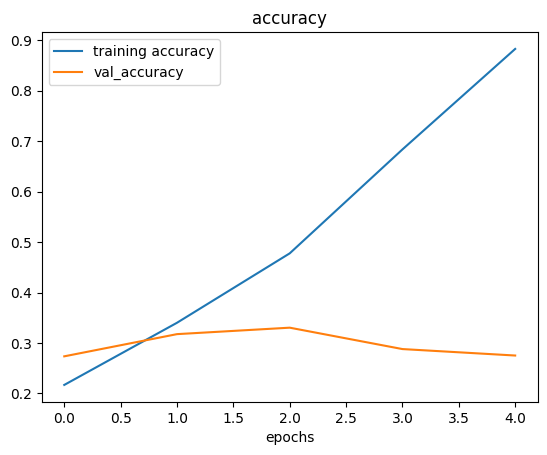

In [92]:
# The curves for model_11 are much better than those of model_9
plot_loss_curves(history_9)

Hence, the curve for `model_11` looks much better. The loss curves are much closer to each other than the baseline model and they look like they're heading in the right direction (certainly not the wrong direction) so if we were to train for longer, we might see further improvements.

### 7. Repeat until satisfied

We could keep going here... continally trying to bring our loss curves closer together and trying to improve the validation/test accuracy.

How?

By running lots of experiments, namely:
- Restructuring our model's architecture (increasing layers/ hidden units)
- Adjust the learning rate
- Try different methods of data augmentation (adjust the hyperparameters in our `ImageDataGenerator` instance)
- Training for longer (eg. 10 epochs instead of 5 epochs)
- Try **transfer learning**

### Making predictions with our trained model

Let's use our trained model to make some predicitons on our own custom images

In [93]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [96]:
# Download some custom images
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

--2024-01-24 05:40:14--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg.1’

03-pizza-dad.jpeg.1 100%[===================>]   2.74M  --.-KB/s    in 0.07s   

2024-01-24 05:40:14 (40.8 MB/s) - ‘03-pizza-dad.jpeg.1’ saved [2874848/2874848]

--2024-01-24 05:40:14--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting

In [107]:
# Reconfig pred_and_plot function to work with multi-class images
def pred_and_plot(model, filename, class_names = class_names):
  """
  Imports an image located at filename, makes a prediction with model and plots the image with the predicted class as the title
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction on the image
  pred = model.predict(tf.expand_dims(img, axis = 0))

  # Add in logic for multi-class and get pred_class name
  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred[0]))]

  # Plot the image and the predicted class
  plt.imshow(img)
  plt.axis(False)
  plt.title(f"Prediction: {pred_class}");

1/1 [==============================] - 0s 18ms/step


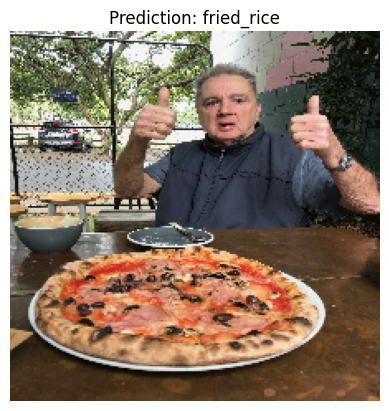

In [110]:
pred_and_plot(model = model_11,
              filename = "03-pizza-dad.jpeg.1",
              class_names = class_names)

1/1 [==============================] - 0s 32ms/step


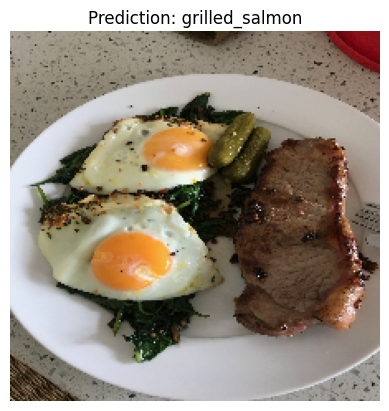

In [111]:
pred_and_plot(model = model_11,
              filename = "03-steak.jpeg.1",
              class_names = class_names)

1/1 [==============================] - 0s 38ms/step


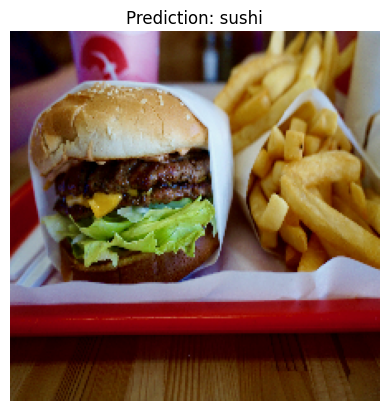

In [112]:
pred_and_plot(model = model_11,
              filename = "03-hamburger.jpeg",
              class_names = class_names)

1/1 [==============================] - 0s 26ms/step


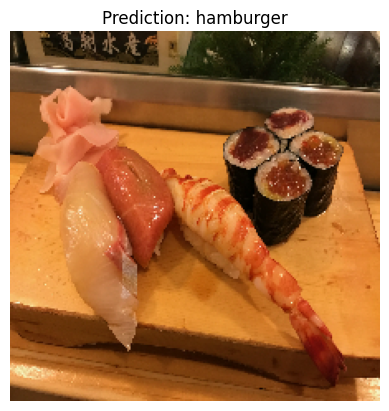

In [113]:
pred_and_plot(model = model_11,
              filename = "03-sushi.jpeg",
              class_names = class_names)

Looks like our model didn't perform very well on our custom images but this is because it only achieved ~34% accuracy hence we can expect it to fucntion poorly on other unseen data

### Saving and loading our model

In [114]:
# Save a model
model_11.save("saved_trained_model_11")

In [115]:
# Load in a trained model and evaluate it
loaded_model_11 = tf.keras.models.load_model("saved_trained_model_11")
loaded_model_11.evaluate(test_data)

79/79 [==============================] - 9s 102ms/step - loss: 1.8910 - accuracy: 0.3412


[1.8910351991653442, 0.34119999408721924]

In [116]:
model_11.evaluate(test_data)

79/79 [==============================] - 9s 117ms/step - loss: 1.8910 - accuracy: 0.3412


[1.8910349607467651, 0.34119999408721924]

Learnt about the classification. Though, the model did not perform as expected. In the upcoming sections, I will be elarning about **transfer learning** and make the model work better.